In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
from PIL import Image
import time

indroot = '/media/senseable-beast/beast-brain-1/Data/streetviewdata/ind/'
imgroot = '/media/senseable-beast/beast-brain-1/Data/streetviewdata/img2/'
tgtroot = '/media/senseable-beast/beast-brain-1/Data/streetviewdata/img/'
# indroot = 'C:/Users/lezhi/Dropbox/thesis/indfake/'
# imgroot = 'C:/Users/lezhi/Dropbox/thesis/img2/'
# tgtroot = 'C:/Users/lezhi/Dropbox/thesis/img/'

# encode and decode ALL png

In [2]:
emptyfiles = []

citynames = sorted([d for d in os.listdir(indroot) if os.path.isdir(indroot)])
for cityname in citynames[:1]: 
    ind_citypath = indroot + cityname
    img_citypath = imgroot + cityname
    
    tgt_citypath = tgtroot + cityname
    if not os.path.exists(tgt_citypath):
        os.makedirs(tgt_citypath)
        
    imgnames = sorted([f[:-4] for f in os.listdir(ind_citypath) if os.path.isfile(os.path.join(ind_citypath, f))])
    
    for i in range(len(imgnames)): 
        ind_filepath = ind_citypath + "/" + imgnames[i] + ".txt"
        img_filepath = img_citypath + "/" + imgnames[i] + ".png"
        
        if os.stat(ind_filepath).st_size > 0:                
            ind = np.loadtxt(ind_filepath).astype(np.uint8)
            
            img = Image.open(img_filepath).convert("RGBA")
            img = img.resize((480, 360), Image.ANTIALIAS)
            # alpha = img.split()[-1]
            # ind = np.array([(j+243) for j in np.nditer(ind)]).reshape(360,480).astype(np.uint8)
            # img.putalpha(ind)

            arr = np.array(img)
            alpha = arr[:, :, 3]

            ind = np.array([(j+243) for j in np.nditer(ind)]).reshape(360,480).astype(np.uint8)
            alpha[:] = ind
            img = Image.fromarray(arr, mode='RGBA')
            img.save(tgt_citypath + "/" + imgnames[i] + ".png")
            
        else:
            emptyfiles.append(cityname + "/" + imgnames[i] + ".txt")

np.savetxt('encode_empty_files'+'.txt', emptyfiles, fmt="%s")
print str(len(emptyfiles)) + " files are empty"

0 files are empty


## encode 1 png

In [77]:
ind = np.load(targetrootdir+'boston/41.350298,2.13597899993_2.npy')
ind

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ..., 
       [4, 9, 9, ..., 1, 1, 1],
       [4, 4, 9, ..., 1, 1, 1],
       [4, 4, 4, ..., 1, 1, 1]], dtype=uint8)

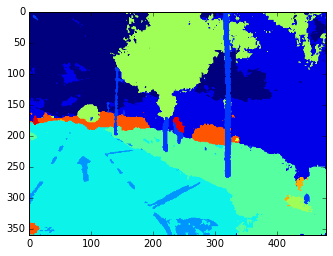

In [67]:
plt.imshow(ind)

In [68]:
img = Image.open(imgrootdir+'barcelona/41.350298,2.13597899993_2.png').convert("RGBA")
img = img.resize((480, 360), Image.ANTIALIAS)
# alpha = img.split()[-1]
# ind = np.array([(j+243) for j in np.nditer(ind)]).reshape(360,480).astype(np.uint8)
# img.putalpha(ind)

arr = np.array(img)
alpha = arr[:, :, 3]

print ind.shape, arr.shape
ind1 = np.array([(j+243) for j in np.nditer(ind)]).reshape(360,480).astype(np.uint8)
alpha[:] = ind1
img = Image.fromarray(arr, mode='RGBA')
img.save('testaaa.png')

(360L, 480L) (360L, 480L, 4L)


In [72]:
ind1

array([[243, 243, 243, ..., 244, 244, 244],
       [243, 243, 243, ..., 244, 244, 244],
       [243, 243, 243, ..., 244, 244, 244],
       ..., 
       [247, 252, 252, ..., 244, 244, 244],
       [247, 247, 252, ..., 244, 244, 244],
       [247, 247, 247, ..., 244, 244, 244]], dtype=uint8)

## decode 1 png

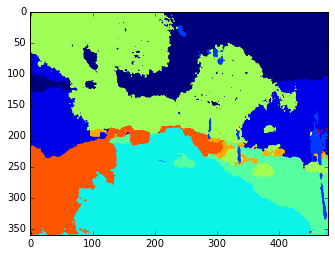

In [5]:
img1 = Image.open(tgtroot+'chicago/41.829604,-87.6424626994_2.png.png')

arr = np.array(img1)
alpha = arr[:, :, 3]
alpha = np.array([(j-243) for j in np.nditer(alpha)]).reshape(360,480).astype(np.uint8)

plt.imshow(alpha)

In [70]:
alpha

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ..., 
       [4, 9, 9, ..., 1, 1, 1],
       [4, 4, 9, ..., 1, 1, 1],
       [4, 4, 4, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
emptyfiles = []

citynames = sorted([d for d in os.listdir(rootdir) if os.path.isdir(rootdir)])
for cityname in citynames:   
    citypath = rootdir + cityname
    
    imgnames = sorted([f[:-4] for f in os.listdir(citypath) if os.path.isfile(os.path.join(citypath, f))])
    
    img = os.path.join(os.path.join(citypath, imgname))
    alpha = img.split()[-1]

    lat_lng_dir = np.array([name.replace('_',',').split(',') for name in imgnames])

    df1 = pd.DataFrame(lat_lng_dir, columns=['lat', 'lng', 'dir']).astype(str)################################################
    df1['city'] = cityname

    sky_area = np.zeros(len(imgnames))

    for i in range(len(imgnames)): 
        filepath = citypath + "/" + imgnames[i] + ".txt"
        if os.stat(filepath).st_size > 0:                
            ind = np.loadtxt(filepath)
            sky_area[i] = np.sum([(j==0) for j in np.nditer(ind)]) # number of pixels with the index of "0"
            del ind
        else:
            emptyfiles.append(cityname + "/" + imgnames[i] + ".txt")
            sky_area[i] = 0

    df1['sky_area'] = sky_area
    df = df.append(df1, ignore_index=True)

df[['lat', 'lng', 'dir']] = df[['lat', 'lng', 'dir']].astype(str)################################################
df.to_csv(rootdir+'sky_area'+'.csv')
np.savetxt(rootdir +'empty_files'+'.txt', emptyfiles, fmt="%s")
print str(len(emptyfiles)) + " files are empty"

### transform .txt to .npy

In [10]:
a = np.round(12*np.random.rand(360,480)).astype(np.uint8)
np.save("testa.npy",a)

In [13]:
emptyfiles = []

citynames = sorted([d for d in os.listdir(rootdir) if os.path.isdir(rootdir)])
for cityname in citynames:   
    citypath = rootdir + cityname
    
    tgt_citypath = targetrootdir + cityname
    if not os.path.exists(tgt_citypath):
        os.makedirs(tgt_citypath)
        
    imgnames = sorted([f[:-4] for f in os.listdir(citypath) if os.path.isfile(os.path.join(citypath, f))])
    
    for i in range(len(imgnames)): 
        filepath = citypath + "/" + imgnames[i] + ".txt"
        
        if os.stat(filepath).st_size > 0:                
            ind = np.loadtxt(filepath).astype(np.uint8)
            np.save(tgt_citypath + "/" + imgnames[i] + ".npy", ind)
            del ind
        else:
            emptyfiles.append(cityname + "/" + imgnames[i] + ".txt")

np.savetxt(rootdir +'empty_files'+'.txt', emptyfiles, fmt="%s")
print str(len(emptyfiles)) + " files are empty"

1 files are empty
